In [2]:
from transpile_benchy.interface import QASMBench, RedQueen
from transpile_benchy.interface import MQTBench

mqt = MQTBench(num_qubits=4, filter_str="hhl")
qasm_bench_s = QASMBench(size="small")
qasm_bench_m = QASMBench(size="medium")
# redqueen = RedQueen()

from transpile_benchy.metrics import DepthMetric
from qiskit.circuit.library import iSwapGate

depth_metric = DepthMetric(basis_gate=iSwapGate().power(1 / 2))

from qiskit.transpiler import CouplingMap

# coupling_map = CouplingMap.from_grid(3,3)

# coupling_map = CouplingMap.from_grid(4,4)
# coupling_map = CouplingMap.from_heavy_hex(5)

from virtual_swap.pass_managers import SabreVS, SabreQiskit  # , QiskitLevel3

Considering xx_plus_yy;	Cost 1 and Euclidean volume   0.00%
Considering xx_plus_yy·xx_plus_yy;	Cost 2 and Euclidean volume  50.00%
Considering xx_plus_yy·xx_plus_yy·xx_plus_yy;	Cost 3 and Euclidean volume 100.00%
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy.xx_plus_yy
100.00% =    1/1    	 | 3.00	 | xx_plus_yy.xx_plus_yy.xx_plus_yy


/home/evm9/virtual-swap/src/virtual_swap/deprecated/__init__.py:3: UserWarning: The package you are importing is deprecated, is not maintained, and may not work as expected.
  warnings.warn(


In [5]:
from qiskit.circuit.library import CXGate, iSwapGate
from qiskit.extensions import UnitaryGate
from weylchamber import canonical_gate
from transpile_benchy.interface import QiskitFunctionInterface
from qiskit.circuit.library import TwoLocal

coupling_map = CouplingMap.from_line(8)


def create_TwoLocal_function(
    entanglement_blocks, entanglement_name, entanglement_type="full", reps=1
):
    """Generates a function to create a TwoLocal object with given parameters"""

    def TwoLocal_function(n_qubits):
        return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

    TwoLocal_function.__name__ = (
        f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
    )
    return TwoLocal_function


def generate_interface_from_data(data, qubits_options):
    """Generates a QiskitFunctionInterface from gate data and qubits options"""
    gate, name = data
    func = create_TwoLocal_function(gate, name)
    return QiskitFunctionInterface(func, qubits_options)


num_qubits_options = [8]  # Or any other options you'd like

# Specify the gate blocks and their names
entanglement_blocks_data = [
    (CXGate(), "cx"),
    (CXGate().power(1 / 2), "scx"),
    (iSwapGate(), "iswap"),
    (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), "ecp"),
    (iSwapGate().power(1 / 2), "siswap"),
]

qiskit_functions_twolocal = [
    generate_interface_from_data(data, num_qubits_options)
    for data in entanglement_blocks_data
]

In [6]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)
# transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        SabreQiskit(coupling_map, cx_basis=True),
        SabreQiskit(coupling_map),
        SabreVS(coupling_map, cx_basis=True),
        SabreVS(coupling_map, logger=transpile_benchy_logger),
    ],
    submodules=qiskit_functions_twolocal,
    metrics=[depth_metric],
    logger=transpile_benchy_logger,
    num_runs=5,
)

# submodules=[qasm_bench_s],
# submodules=[mqt],
# submodules=[
# MQTBench(num_qubits=4, filter_str="qaoa"),
# # MQTBench(num_qubits=8, filter_str="qaoa"),
# # MQTBench(num_qubits=12, filter_str="qaoa"),
# # MQTBench(num_qubits=16, filter_str="qaoa"),
# ],

benchmark.run()

Considering cx;	Cost 1 and Euclidean volume   0.00%
Considering cx·cx;	Cost 2 and Euclidean volume   0.00%
Considering cx·cx·cx;	

INFO:transpile_benchy:Running benchmarks for circuits...


Cost 3 and Euclidean volume 100.00%
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx


Running circuits for QiskitFunctionInterface:   0%|          | 0/1 [00:00<?, ?it/s]INFO:transpile_benchy:Transpiler Qiskit-CX, twolocal_full_cx_1reps_8: 43
INFO:transpile_benchy:Transpiler Qiskit-CX, twolocal_full_cx_1reps_8: 46
INFO:transpile_benchy:Transpiler Qiskit-CX, twolocal_full_cx_1reps_8: 44
INFO:transpile_benchy:Transpiler Qiskit-CX, twolocal_full_cx_1reps_8: 43
INFO:transpile_benchy:Transpiler Qiskit-CX, twolocal_full_cx_1reps_8: 42
INFO:transpile_benchy:Transpiler Qiskit-sqrtiSWAP, twolocal_full_cx_1reps_8: 56
INFO:transpile_benchy:Transpiler Qiskit-sqrtiSWAP, twolocal_full_cx_1reps_8: 56
INFO:transpile_benchy:Transpiler Qiskit-sqrtiSWAP, twolocal_full_cx_1reps_8: 56
INFO:transpile_benchy:Transpiler Qiskit-sqrtiSWAP, twolocal_full_cx_1reps_8: 61
INFO:transpile_benchy:Transpiler Qiskit-sqrtiSWAP, twolocal_full_cx_1reps_8: 56
INFO:transpile_benchy:Transpiler SABREVS-CX, twolocal_full_cx_1reps_8: 49
INFO:transpile_benchy:Transpiler SABREVS-CX, twolocal_full_cx_1reps_8: 24
INFO

In [7]:
print(benchmark.results)

Metric: monodromy_depth, Circuit: twolocal_full_cx_1reps_8, Transpiler: Qiskit-CX
  Best result: 42
  Worst result: 46
  Average result: 43.58
  Standard error: 1.52
Metric: monodromy_depth, Circuit: twolocal_full_cx_1reps_8, Transpiler: Qiskit-sqrtiSWAP
  Best result: 56
  Worst result: 61
  Average result: 56.97
  Standard error: 2.24
Metric: monodromy_depth, Circuit: twolocal_full_cx_1reps_8, Transpiler: SABREVS-CX
  Best result: 24
  Worst result: 52
  Average result: 36.80
  Standard error: 13.86
Metric: monodromy_depth, Circuit: twolocal_full_cx_1reps_8, Transpiler: SABREVS-sqrtiSWAP
  Best result: 26
  Worst result: 56
  Average result: 34.27
  Standard error: 14.52
Metric: monodromy_depth, Circuit: twolocal_full_scx_1reps_8, Transpiler: Qiskit-CX
  Best result: 57
  Worst result: 62
  Average result: 59.56
  Standard error: 2.30
Metric: monodromy_depth, Circuit: twolocal_full_scx_1reps_8, Transpiler: Qiskit-sqrtiSWAP
  Best result: 57
  Worst result: 62
  Average result: 59.77


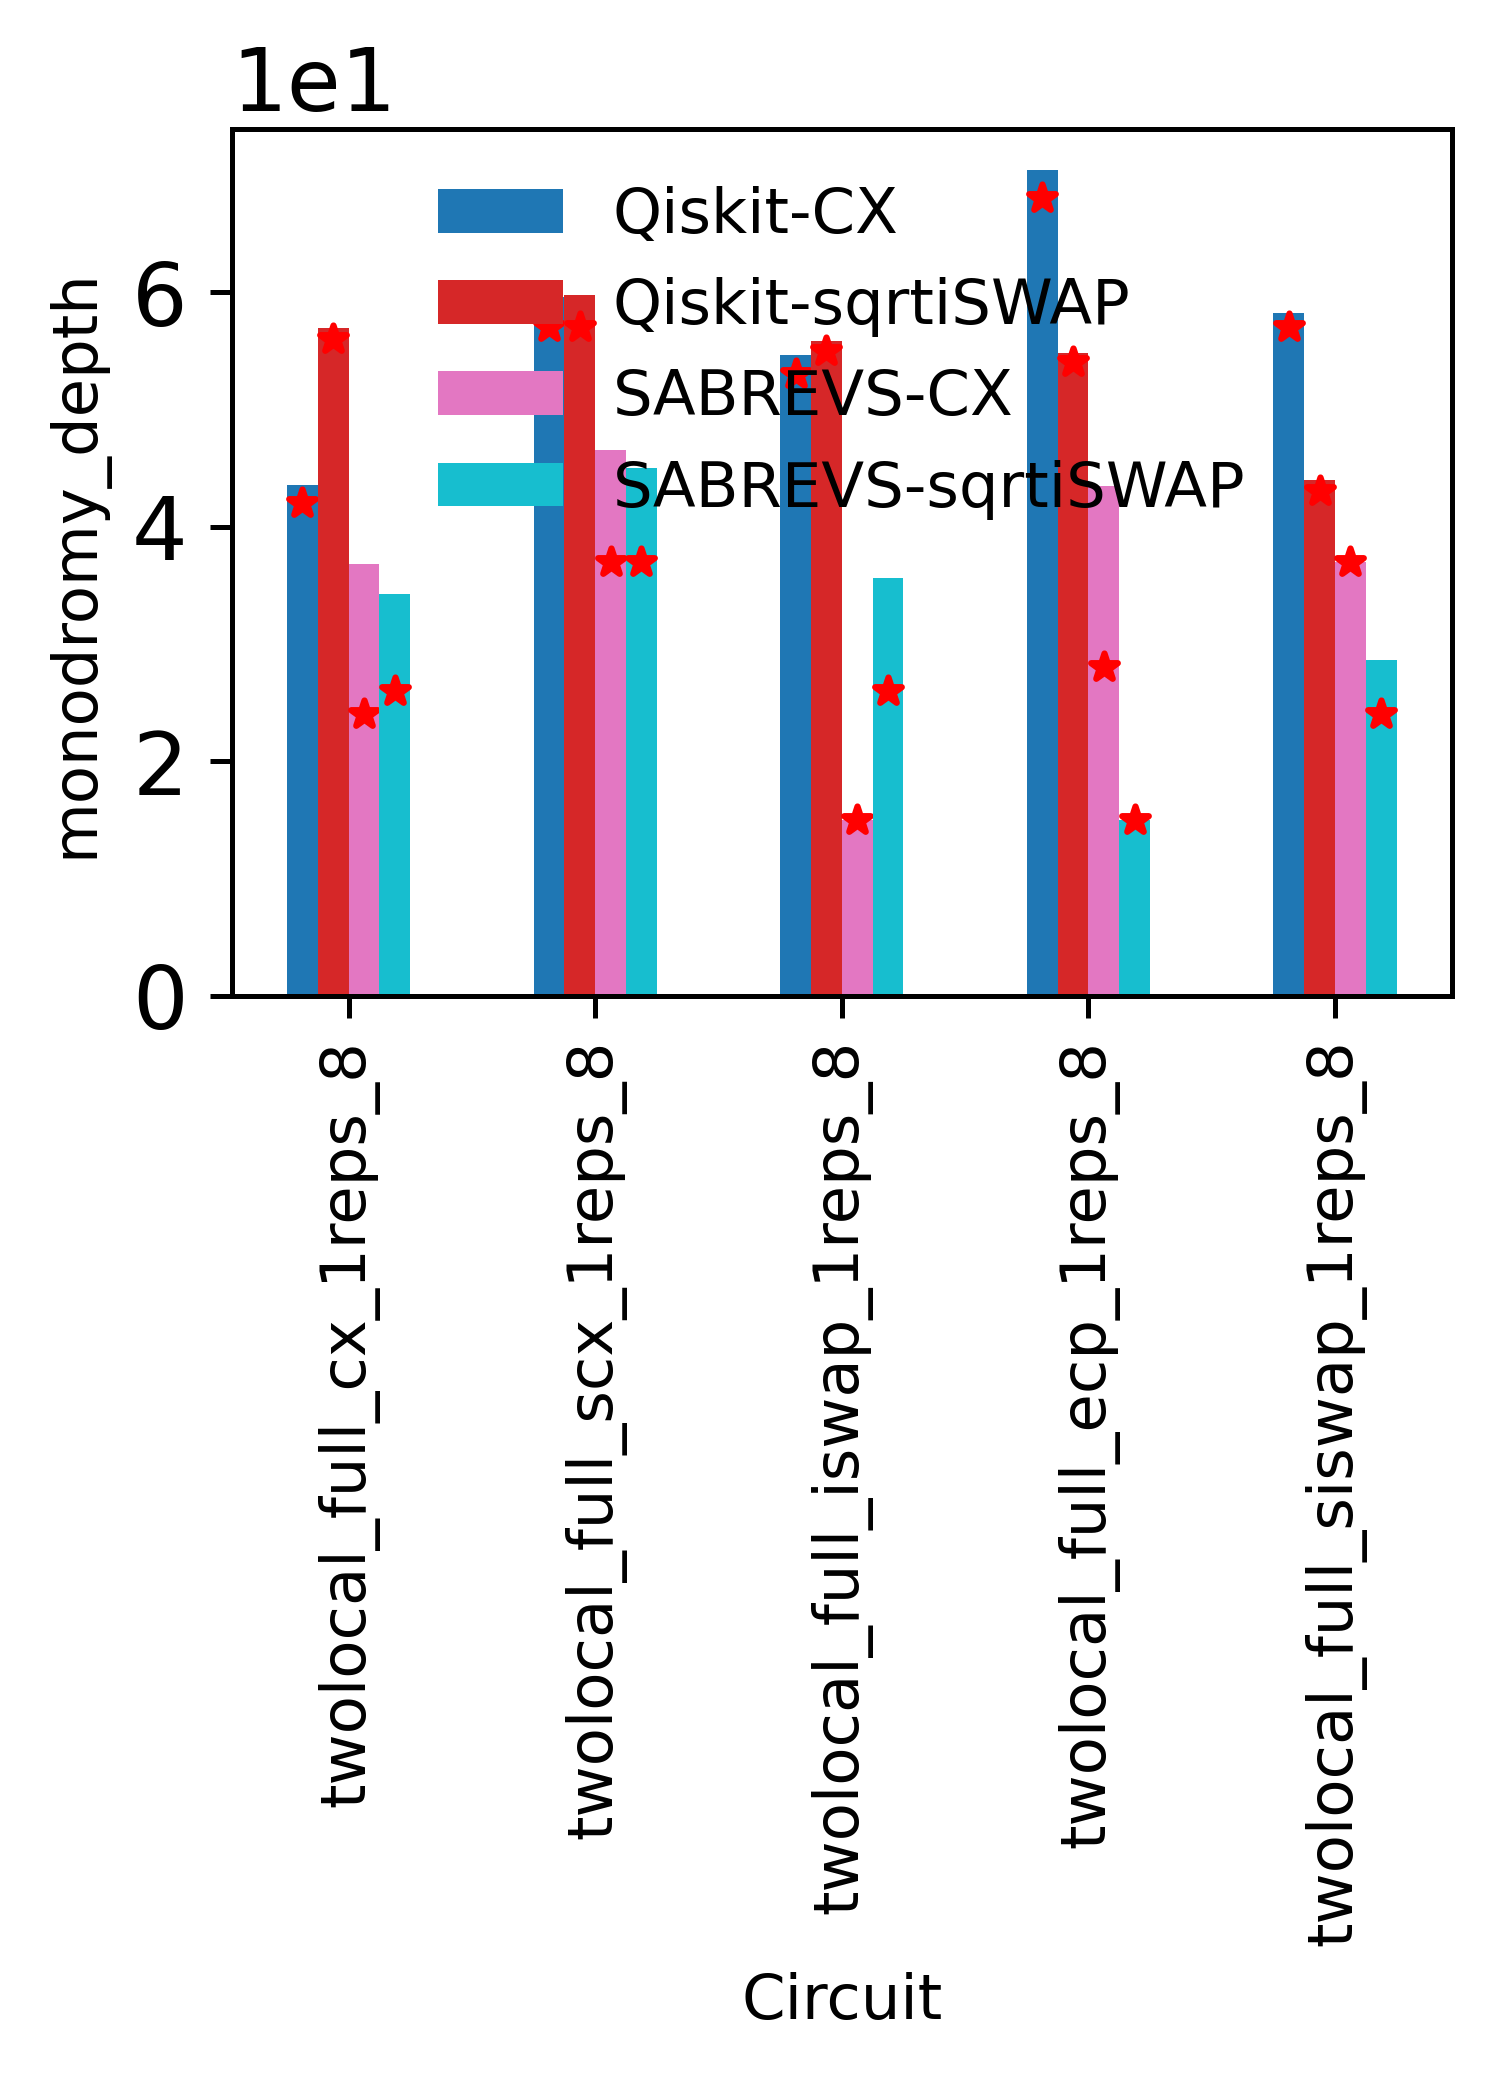

In [12]:
benchmark.plot(save=True)

In [ ]:
# from transpile_benchy.interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# entanglement_types = ["linear", "full", "circular", "sca"]
# entanglement_types = ["full"] #, "reverse_linear"]


# def function_generator(entanglement_type):
#     def entanglement_function(n_qubits):
#         return TwoLocal(n_qubits, ["ry"], "cx", entanglement_type, reps=1)

#     entanglement_function.__name__ = f"TwoLocal_{entanglement_type}"
#     return entanglement_function


# num_qubits_options = [8]

# qiskit_functions_twolocal = [
#     QiskitFunctionInterface(function_generator(entanglement_type), num_qubits_options)
#     for entanglement_type in entanglement_types
# ]

# # 5Q backend = provider.backend.ibmq_quito
# # 20Q backend = provider.backend.ibmq_mumbai
# from typing import Callable, List
# from transpile_benchy.interface import QiskitFunctionInterface

# num_qubits = [8]  # , 20, 24, 28, 32, 36]
# from qiskit.circuit.library import QFT, QuantumVolume

# qiskit_functions_qft = QiskitFunctionInterface(QFT, num_qubits)
# qiskit_functions_qv = QiskitFunctionInterface(QuantumVolume, num_qubits)
# next(MQTBench(num_qubits=4, filter_str="qaoa").get_quantum_circuits()).draw('mpl', fold=-1)
# next(qasm_bench_m.get_quantum_circuits())

In [ ]:
# from the literature
# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64